In [1]:
import pandas as pd

# Specify the file path
file_path = "Risk model and Elderly Dataset - Final Cleaned Data.xlsx"

# Read the specified sheet into a DataFrame
df = pd.read_excel(file_path, sheet_name="Deleted Daysdeathandoperation")

# Display the first few rows of the DataFrame
print(df.head())


   Indexno  AGE  GENDER  RCRI score Anemia category  PreopEGFRMDRD  \
0       10   73    MALE           0            mild      98.651255   
1       16   59    MALE           1            none      91.215796   
2       17   58  FEMALE           0            none      81.927857   
3       18   49  FEMALE           1            none      89.312233   
4       22   73  FEMALE           0            none      85.394368   

  GradeofKidneydisease @30daymortality  Preoptransfusionwithin30days  Intraop  \
0                   g1              NO                             0        0   
1                   g1              NO                             0        0   
2                   G2              NO                             0        0   
3                   G2              NO                             0        0   
4                   G2              NO                             0        0   

   ...  CVARCRICategory  IHDRCRICategory CHFRCRICategory  \
0  ...               no         

In [2]:
null_counts = df.isnull().sum()

# Display the null counts
print(null_counts)

Indexno                              0
AGE                                  0
GENDER                               0
RCRI score                           0
Anemia category                      0
PreopEGFRMDRD                        0
GradeofKidneydisease                 0
@30daymortality                      0
Preoptransfusionwithin30days         0
Intraop                              0
Postopwithin30days                   0
Transfusionintraandpostop            0
AnaestypeCategory                    0
PriorityCategory                     0
TransfusionIntraandpostopCategory    0
AGEcategory                          0
AGEcategoryOriginal                  0
Mortality                            0
thirtydaymortality                   0
SurgRiskCategory                     0
RaceCategory                         0
CVARCRICategory                      0
IHDRCRICategory                      0
CHFRCRICategory                      0
DMinsulinRCRICategory                0
CreatinineRCRICategory   

In [3]:
df = df.drop('Indexno', axis=1)
df = df.drop('AGEcategoryOriginal', axis=1)

In [4]:
import numpy as np
from scipy.stats import zscore

# Specify the columns that you want to check for outliers
columns_to_check = ['PreopEGFRMDRD']  # Add more columns as needed

# Compute the Z-scores for the selected columns
z_scores = np.abs(zscore(df[columns_to_check]))

# Set the Z-score threshold to identify outliers (e.g., > 3 standard deviations)
z_score_threshold = 3

# Find the indices of the outliers
outlier_indices = np.where(z_scores > z_score_threshold)

# Replace the outliers with the median value
df[columns_to_check] = np.where(z_scores > z_score_threshold, df[columns_to_check].median(), df[columns_to_check])

# Display the modified DataFrame
print(df)

       AGE  GENDER  RCRI score Anemia category  PreopEGFRMDRD  \
0       73    MALE           0            mild      98.651255   
1       59    MALE           1            none      91.215796   
2       58  FEMALE           0            none      81.927857   
3       49  FEMALE           1            none      89.312233   
4       73  FEMALE           0            none      85.394368   
...    ...     ...         ...             ...            ...   
53463   53  FEMALE           0            none      65.384750   
53464   52    MALE           0            none      86.091241   
53465   81  FEMALE           0            none      57.609630   
53466   66  FEMALE           2            mild      48.339582   
53467   45  FEMALE           0            mild     125.902498   

      GradeofKidneydisease @30daymortality  Preoptransfusionwithin30days  \
0                       g1              NO                             0   
1                       g1              NO                         

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Specify the columns containing numerical data
numerical_columns = ['AGE','PreopEGFRMDRD']  # Add more columns as needed

# Perform Min-Max scaling
# scaler = MinMaxScaler()
# df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Perform Standardization
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the scaled DataFrame
print(df)


            AGE  GENDER  RCRI score Anemia category  PreopEGFRMDRD  \
0      1.128443    MALE           0            mild       0.108703   
1      0.278547    MALE           1            none      -0.131308   
2      0.217840  FEMALE           0            none      -0.431117   
3     -0.328522  FEMALE           1            none      -0.192754   
4      1.128443  FEMALE           0            none      -0.319220   
...         ...     ...         ...             ...            ...   
53463 -0.085694  FEMALE           0            none      -0.965117   
53464 -0.146401    MALE           0            none      -0.296725   
53465  1.614097  FEMALE           0            none      -1.216092   
53466  0.703495  FEMALE           2            mild      -1.515323   
53467 -0.571349  FEMALE           0            mild       0.988354   

      GradeofKidneydisease @30daymortality  Preoptransfusionwithin30days  \
0                       g1              NO                             0   
1      

In [6]:
# Specify the categorical columns to encode
categorical_columns = ['GENDER', 'Anemia category', 'GradeofKidneydisease', '@30daymortality', 
                       'AnaestypeCategory', 'PriorityCategory', 'TransfusionIntraandpostopCategory', 
                       'AGEcategory', 'thirtydaymortality', 'SurgRiskCategory', 'RaceCategory', 'CVARCRICategory',
                       'IHDRCRICategory', 'CHFRCRICategory', 'DMinsulinRCRICategory', 'CreatinineRCRICategory', 
                       'GradeofKidneyCategory', 'Anemiacategorybinned', 'RDW15.7', 'ASAcategorybinned', 'ICUAdmgt24h']  # Add more columns as needed

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the encoded DataFrame
print(df_encoded)

            AGE  RCRI score  PreopEGFRMDRD  Preoptransfusionwithin30days  \
0      1.128443           0       0.108703                             0   
1      0.278547           1      -0.131308                             0   
2      0.217840           0      -0.431117                             0   
3     -0.328522           1      -0.192754                             0   
4      1.128443           0      -0.319220                             0   
...         ...         ...            ...                           ...   
53463 -0.085694           0      -0.965117                             0   
53464 -0.146401           0      -0.296725                             0   
53465  1.614097           0      -1.216092                             0   
53466  0.703495           2      -1.515323                             0   
53467 -0.571349           0       0.988354                             0   

       Intraop  Postopwithin30days  Transfusionintraandpostop Mortality  \
0           

In [7]:
df_encoded = df_encoded.drop('Mortality', axis=1)

In [8]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on the 'Mortality' column
df['Mortality'] = label_encoder.fit_transform(df['Mortality'])

# Display the encoded DataFrame
print(df['Mortality'])

0        1
1        0
2        0
3        0
4        0
        ..
53463    0
53464    0
53465    0
53466    0
53467    0
Name: Mortality, Length: 53468, dtype: int32


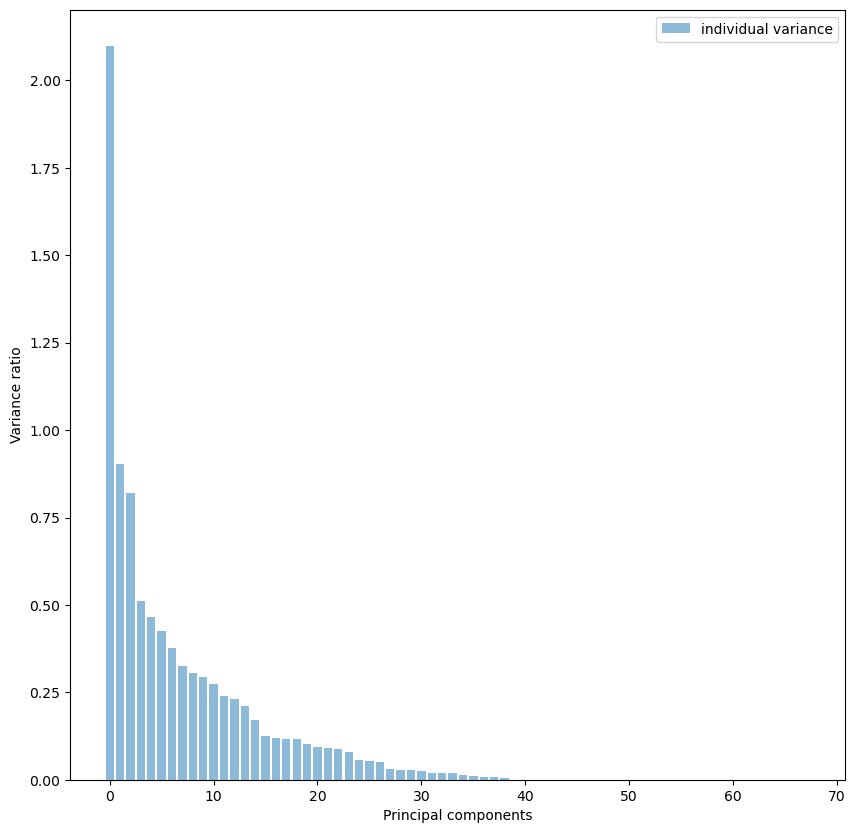

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit_transform(df_encoded)
pca_variance = pca.explained_variance_

plt.figure(figsize=(10, 10))
plt.bar(range(68), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

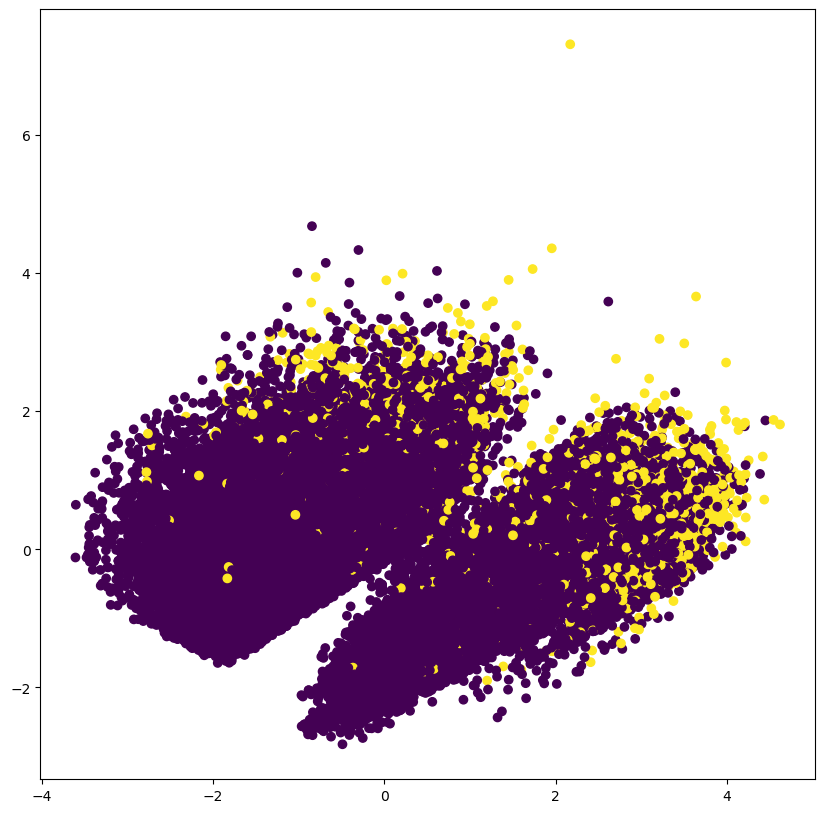

In [10]:
pca = PCA(n_components = 30)
pca.fit(df_encoded)
T = pca.transform(df_encoded)

plt.figure(figsize=(10,10))
plt.scatter(T[:,0], T[:,1], c=df['Mortality'])
plt.show()

In [11]:
# Assign x as the feature matrix
x = df_encoded

# Create an instance of PCA with the desired number of components
pca = PCA(n_components = 30)

# Fit PCA on the feature matrix
pca.fit(x)

# Transform the feature matrix to the reduced dimensionality
x_pca = pca.transform(x)

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Print the singular values (eigenvalues) of the components
print("Singular Values (Eigenvalues):", pca.singular_values_)

Explained Variance Ratio: [0.23422306 0.10079965 0.09161181 0.05702522 0.05209231 0.04762137
 0.04201452 0.03641772 0.03421074 0.03289695 0.03047929 0.02663726
 0.02591638 0.0235574  0.01907938 0.0140856  0.0134606  0.01299155
 0.01289708 0.01128624 0.01052439 0.0100553  0.00966005 0.00898431
 0.00624026 0.00584082 0.00573623 0.00348909 0.00317253 0.00295834]
Singular Values (Eigenvalues): [334.88224715 219.68824328 209.43682321 165.23832009 157.92980635
 151.000453   141.83290367 132.0485626  127.98484945 125.50329672
 120.80354988 112.93331933 111.39469565 106.20402643  95.57832208
  82.12303845  80.28039892  78.8692509   78.58199264  73.51094329
  70.9865059   69.38648915  68.00909134  65.5872851   54.66113664
  52.88275166  52.40714503  40.87271829  38.97444046  37.63578993]


In [12]:
class_counts = df['Mortality'].value_counts()
print(class_counts)

0    50354
1     3114
Name: Mortality, dtype: int64


In [13]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Assign x as the feature matrix and y as the target variable
x = x_pca
y = df['Mortality']

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the training data
x_train_resampled, y_train_resampled = oversampler.fit_resample(x_train, y_train)
#x_test_os, y_test_os = oversampler.fit_resample(x_test, y_test)

# Print the class distribution before and after oversampling
print("Class distribution before oversampling:")
print(y_train.value_counts())
print("Class distribution after oversampling:")
print(y_train_resampled.value_counts())

x_train, y_train, = x_train_resampled, y_train_resampled
#x_test, y_test = x_test_os,  y_test_os

Class distribution before oversampling:
0    40262
1     2512
Name: Mortality, dtype: int64
Class distribution after oversampling:
0    40262
1    40262
Name: Mortality, dtype: int64


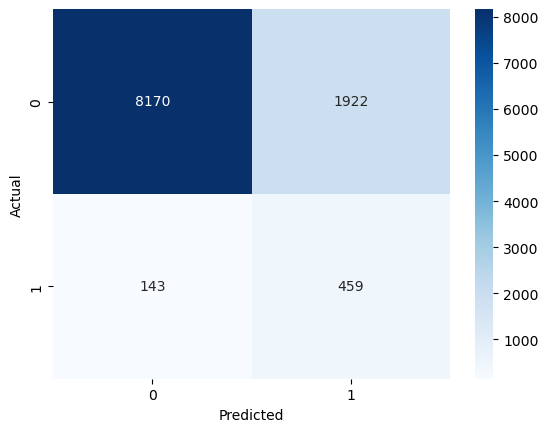

              precision    recall  f1-score   support

           0       0.98      0.81      0.89     10092
           1       0.19      0.76      0.31       602

    accuracy                           0.81     10694
   macro avg       0.59      0.79      0.60     10694
weighted avg       0.94      0.81      0.86     10694



In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Create and train a logistic regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


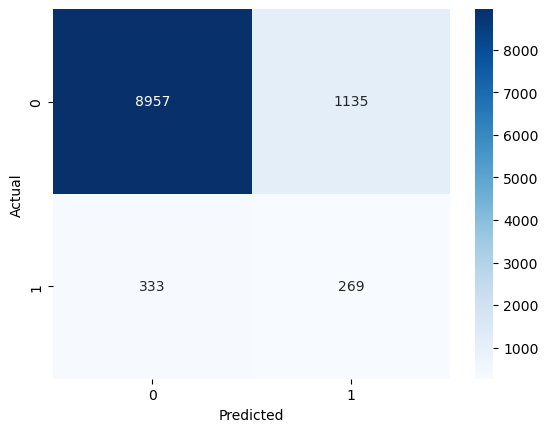

              precision    recall  f1-score   support

           0       0.96      0.89      0.92     10092
           1       0.19      0.45      0.27       602

    accuracy                           0.86     10694
   macro avg       0.58      0.67      0.60     10694
weighted avg       0.92      0.86      0.89     10694



In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train a KNN classifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


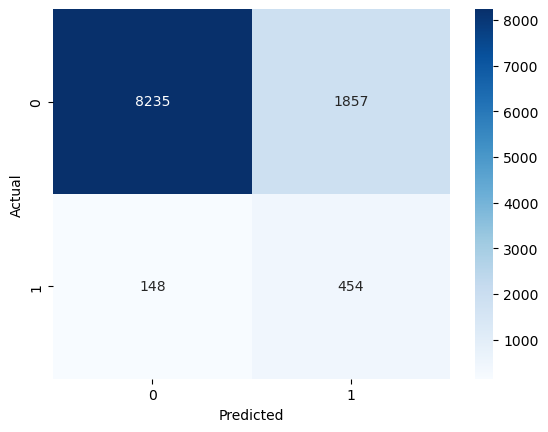

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     10092
           1       0.20      0.75      0.31       602

    accuracy                           0.81     10694
   macro avg       0.59      0.79      0.60     10694
weighted avg       0.94      0.81      0.86     10694



In [16]:
from sklearn.svm import SVC

# Create and train an SVM classifier
svm = SVC()
svm.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


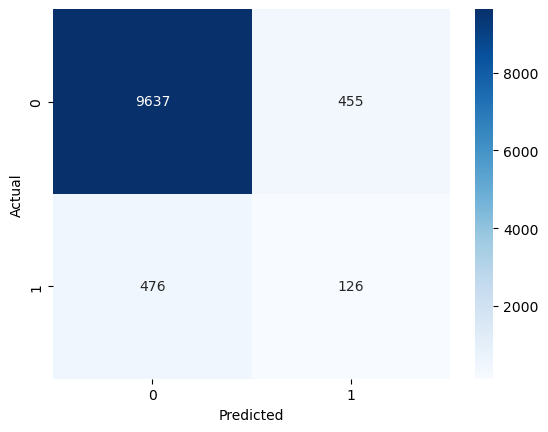

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10092
           1       0.22      0.21      0.21       602

    accuracy                           0.91     10694
   macro avg       0.58      0.58      0.58     10694
weighted avg       0.91      0.91      0.91     10694



In [17]:
from sklearn.tree import DecisionTreeClassifier

# Create and train a Decision Tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


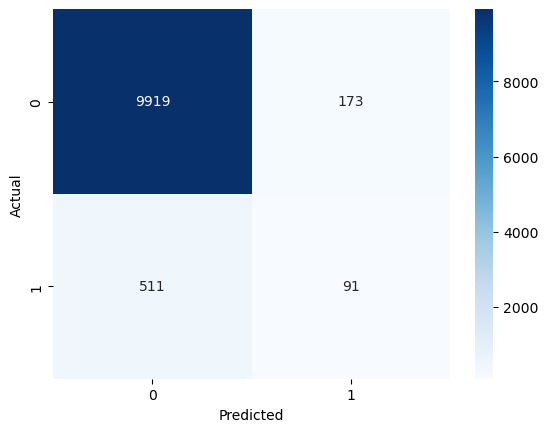

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     10092
           1       0.34      0.15      0.21       602

    accuracy                           0.94     10694
   macro avg       0.65      0.57      0.59     10694
weighted avg       0.92      0.94      0.92     10694



In [18]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest classifier
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


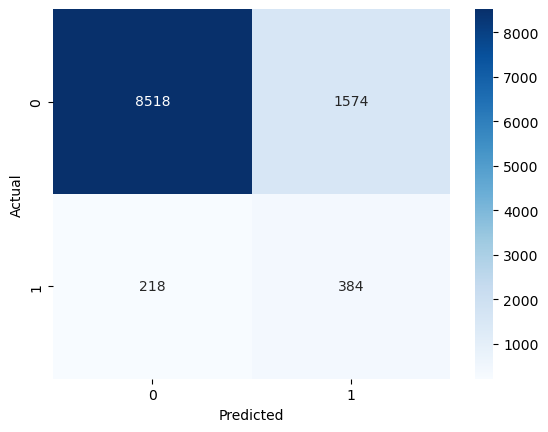

              precision    recall  f1-score   support

           0       0.98      0.84      0.90     10092
           1       0.20      0.64      0.30       602

    accuracy                           0.83     10694
   macro avg       0.59      0.74      0.60     10694
weighted avg       0.93      0.83      0.87     10694



In [19]:
from sklearn.naive_bayes import GaussianNB

# Create and train a Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


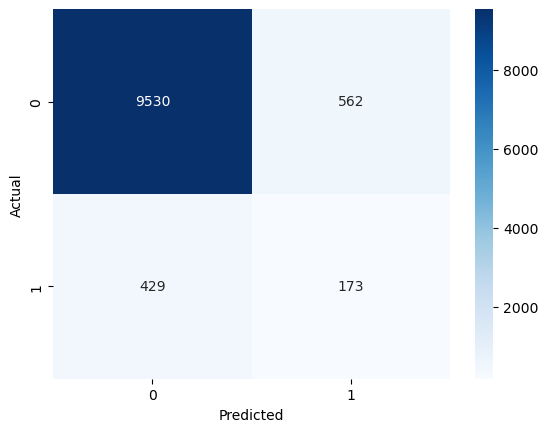

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     10092
           1       0.24      0.29      0.26       602

    accuracy                           0.91     10694
   macro avg       0.60      0.62      0.60     10694
weighted avg       0.92      0.91      0.91     10694



In [20]:
from sklearn.neural_network import MLPClassifier

# Create and train an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=1000, random_state=42)
mlp.fit(x_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


In [21]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(max_iter=1000, tol=1e-3)
pred = sgdc.fit(x_train, y_train).predict(x_test)

print('##-- Stochastic Gradient Descent --## ')
print('Accuracy of Classifier on training set: {:.2f}'.format(sgdc.score(x_train, y_train)))
print('Accuracy of Classifier on test set: {:.2f}'.format(sgdc.score(x_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (sgdc, classification_report(y_test, pred)))

##-- Stochastic Gradient Descent --## 
Accuracy of Classifier on training set: 0.80
Accuracy of Classifier on test set: 0.81

 Classification report for classifier SGDClassifier():
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     10092
           1       0.19      0.75      0.30       602

    accuracy                           0.81     10694
   macro avg       0.59      0.78      0.59     10694
weighted avg       0.94      0.81      0.85     10694




In [22]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100)
pred = ada.fit(x_train, y_train).predict(x_test)

print('##-- Ada Boost Classifier --## ')
print('Accuracy of Classifier on training set: {:.2f}'.format(ada.score(x_train, y_train)))
print('Accuracy of Classifier on test set: {:.2f}'.format(ada.score(x_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (ada, classification_report(y_test, pred)))

##-- Ada Boost Classifier --## 
Accuracy of Classifier on training set: 0.81
Accuracy of Classifier on test set: 0.80

 Classification report for classifier AdaBoostClassifier(n_estimators=100):
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     10092
           1       0.19      0.75      0.30       602

    accuracy                           0.80     10694
   macro avg       0.58      0.78      0.59     10694
weighted avg       0.94      0.80      0.85     10694




In [23]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
pred = xgb.fit(x_train, y_train).predict(x_test)
pred = [round(value) for value in pred]

print('##-- XGB Classifier --## ')
print('Accuracy of Classifier on training set: {:.2f}'.format(xgb.score(x_train, y_train)))
print('Accuracy of Classifier on test set: {:.2f}'.format(xgb.score(x_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (xgb, classification_report(y_test, pred)))

##-- XGB Classifier --## 
Accuracy of Classifier on training set: 0.96
Accuracy of Classifier on test set: 0.88

 Classification report for classifier XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...):
              precision    recall  f1-score   support

           0       0.97      0.90      0.94     10092
           1       0.25      0.53      0